# Interpolation Visualization

The total addressable Market (TAM) and the adoption of a solution are important parameters of the Drawdown model. They are derived from research data and they must be interpolated, if the data is not available on an annual basis. Interpolation is done by fitting a function and there are four possible functions that might be used: linear, second degree polynomial, third degree polynomial and exponential. This notebook is designed to interactively visualize the different interpolation methods for both TAM and adoption of all available drawdown solutions. Running the following cell starts a light weight interactive app. Choose the solution, the dataset and the region you are intersted in and click the "Plot" button on the right.

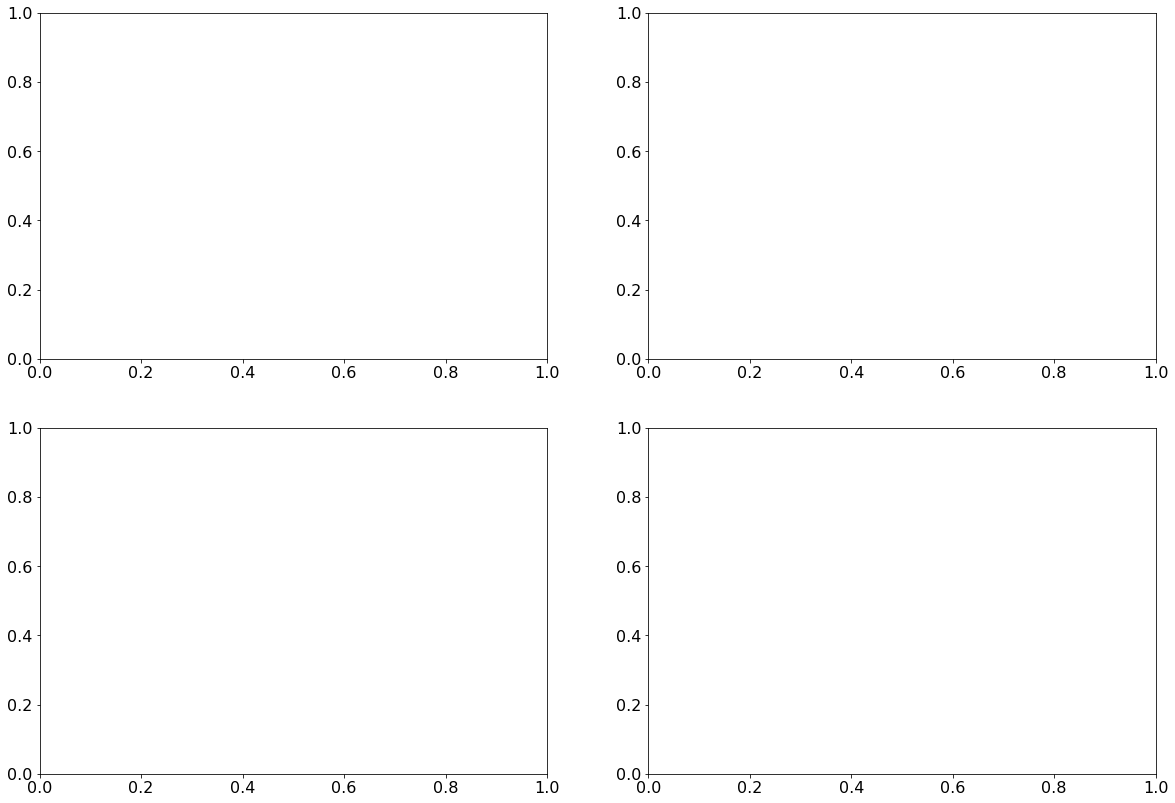

afforestation World FAO 2015


In [74]:
from solution import factory
import pandas as pd
import matplotlib.pyplot as plt
from model import interpolation
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Output
from IPython.display import display, clear_output
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 70em; }</style>"))
%matplotlib inline

def get_data(solution='afforestation', variable='TAM', region='World'):
    (constructor, scenarios) = factory.one_solution_scenarios(solution)
    con = constructor(scenarios[0])
    if variable == 'TAM':
        if hasattr(con, 'tm'):
            data = con.tm.forecast_data(region)
        else:
            data = con.ad.adoption_data(region)
    elif variable == 'AD':
        data = con.ad.adoption_data(region)
    return data, con

def get_variables(con):
    variables = []
    if hasattr(con, 'tm'):
        variables.append('TAM')
    if hasattr(con, 'ad'):
        if hasattr(con.ad, 'adoption_data'):
            variables.append('AD')
    return variables

data, con = get_data()

plt.rcParams["figure.figsize"] = (20, 14)
plt.rcParams["font.size"] = 16

def f_sol(x):
    data, con = get_data(solution=x)
    research_dropdown.options = data.columns 
    variables_dropdown.children[0].options = get_variables(con)
    return x

def f_var(x):
    solution = solutions_dropdown.children[0].value
    data, con = get_data(solution=solution, variable=x)
    research_dropdown.options = data.columns
    return x

def plotting(data_linear_ip,
            data_poly_degree2_trend,
            data_poly_degree3_trend,
            data_exponential_ip,
            data):

    for x in ax.flat:
        x.clear()
        x.plot(data.index, data.values)
        x.set_xlabel('Years')

    p1 = ax[0,0].plot(data_linear_ip.index, data_linear_ip.adoption)
    ax[0,0].set_title('Linear Interpolation')
    ax[0,0].legend(('Data', 'Interpolation'))

    p2 = ax[0,1].plot(data_poly_degree2_trend.index, data_poly_degree2_trend.adoption)
    ax[0,1].set_title('Polynomial 2nd')

    p3 = ax[1,0].plot(data_poly_degree3_trend.index, data_poly_degree3_trend.adoption)
    ax[1,0].set_title('Polynomial 3rd')

    p4 = ax[1,1].plot(data_exponential_ip.index, data_exponential_ip.adoption)
    ax[1,1].set_title('Exponential')

    with output:
        display(fig)
    
    return p1, p2, p3, p4
    
def button_on_click(x):
    # Interpolate random data
    data, con = get_data(solution=solutions_dropdown.children[0].value,
                    variable=variables_dropdown.children[0].value,
                    region=region_dropdown.value)
    data = data[research_dropdown.value]
    print(solutions_dropdown.children[0].value,
                    region_dropdown.value,
                    research_dropdown.value)
    
    data_linear_ip = interpolation.linear_trend(data)
    data_poly_degree2_trend = interpolation.poly_degree2_trend(data)
    data_poly_degree3_trend = interpolation.poly_degree3_trend(data)
    data_exponential_ip = interpolation.exponential_trend(data)
    
    with output:
        clear_output(True)
    
    plots = plotting(data_linear_ip,
                    data_poly_degree2_trend,
                    data_poly_degree3_trend,
                    data_exponential_ip,
                    data)
    return plots

all_solutions = factory.all_solutions()
solutions_dropdown = interactive(f_sol, x=all_solutions);
solutions_dropdown.children[0].description = 'Solutions'

research_options = data.columns
research_dropdown = widgets.Dropdown(
    options=research_options,
    value=research_options[0],
    description='Source:',
    disabled=False,
)

variables = get_variables(con)
if variables:
    default_variable = variables[0]
else:
    default_variable = ''

variables_dropdown = interactive(f_var, x=variables)
variables_dropdown.children[0].description = 'Variables'

region_options = ['World', 'OECD90', 'Eastern Europe', 'Asia (Sans Japan)',
                  'Middle East and Africa', 'Latin America', 'China',
                  'India', 'EU', 'USA']
region_dropdown = widgets.Dropdown(
    options=region_options,
    value=region_options[0],
    description='Region:',
    disabled=False,
)

button = widgets.Button(
    description='Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Plot',
    icon='Plot'  # (FontAwesome names without the `fa-` prefix)
)

output_layout = widgets.Layout(display='flex',
                    flex_flow='row nowrap',
                    align_items='stretch',
                    border='none',
                    width='100%',
                    margin='10px 100px 10px 100px')

output = widgets.Output(layout=output_layout)

with output:
    fig, ax = plt.subplots(2,2)
    
test = button.on_click(button_on_click)
box_layout = widgets.Layout(display='flex',
                    flex_flow='column nowrap',
                    align_items='center',
                    border='none',
                    width='100%',
                    margin='10px 10px 10px 10px')

box=widgets.Box([solutions_dropdown, variables_dropdown, research_dropdown, region_dropdown, button], layout=box_layout)
app_layout = widgets.Layout(display='flex',
                    flex_flow='column nowrap',
                    align_items='center',
                    border='none',
                    width='100%',
                    margin='10px 10px 10px 10px')
app=widgets.VBox([box, output], layout=app_layout)
display(app)

In [63]:
dir(con)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ac',
 'ad',
 'ae',
 'c2',
 'c4',
 'ef',
 'fc',
 'ht',
 'name',
 'oc',
 'pds_ca',
 'ref_ca',
 'scenario',
 'solution_category',
 'tla_per_region',
 'ua',
 'units',
 'vmas']

In [69]:
dir(con.ad)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adoption_data',
 '_adoption_trend',
 '_get_data_sources',
 '_low_med_high',
 '_min_max_sd',
 '_name_to_identifier',
 '_populate_adoption_data',
 '_set_adoption_one_region',
 'ac',
 'adconfig',
 'adoption_data',
 'adoption_data_main_with_regional',
 'adoption_data_per_region',
 'adoption_is_single_source',
 'adoption_low_med_high',
 'adoption_min_max_sd',
 'adoption_trend',
 'adoption_trend_per_region',
 'clean_nan',
 'data_sources',
 'main_includes_regional',
 'to_json']